# 监督学习

In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

## 分类与回归

分类问题的目标是预测类别标签，回归任务目标是预测一个连续值

## 泛化、过拟合与欠拟合

过拟合：构建一个对现有信息量来说过于复杂的模型

欠拟合：过于简单的模型

模型越复杂，训练数据预测结果越好，但是过于复杂就不能很好的泛化到新数据上

## 监督学习

### 一些样本数据集

模拟二分类数据集forge数据集

In [2]:
X, y = mglearn.datasets.make_forge()

/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


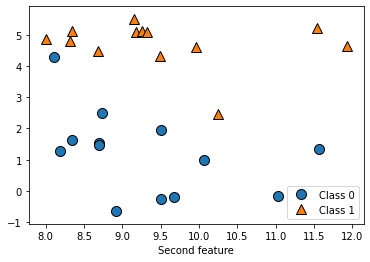

In [3]:
#forge数据的散点图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.xlabel("Second feature")
print("X.shape: {}".format(X.shape))
#数据包含26个数据点和2个特征

Text(0, 0.5, 'Target')

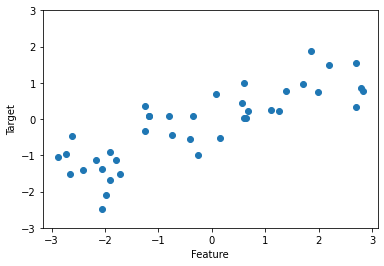

In [4]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

现实中的数据集

癌症数据

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
print("shape of cancer data: {}".format(cancer.data.shape))#569个数据点，30个特征

shape of cancer data: (569, 30)


In [7]:
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
#212个恶性肿瘤，357个良性

Sample counts per class:
{'malignant': 212, 'benign': 357}


feature属性

In [8]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### K近邻

K近邻分类

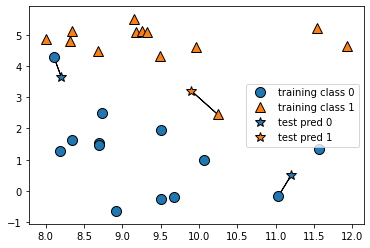

In [9]:
#只考虑一个最近邻
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


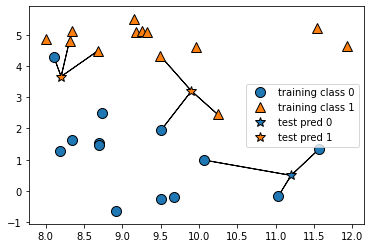

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

将数据分为训练集和测试集评估泛化性能

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy:0.86


分别将1，3，9个邻居可视化

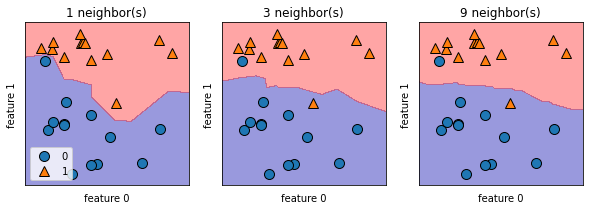

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc = 3)

k越少模型越复杂

对不同邻居个数对训练和测试集的性能进行评估

In [18]:
from sklearn.datasets import load_breast_cancer

In [19]:
cancer = load_breast_cancer()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

In [21]:
training_accuracy = []
test_accuracy = []

In [22]:
neighbors_settings = range(1, 11)

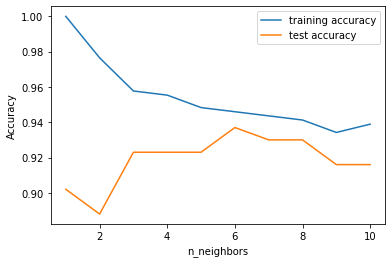

In [23]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))#记录训练集精度
    test_accuracy.append(clf.score(X_test, y_test))#记录测试集精度

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k近邻回归

k金陵也可用于回归

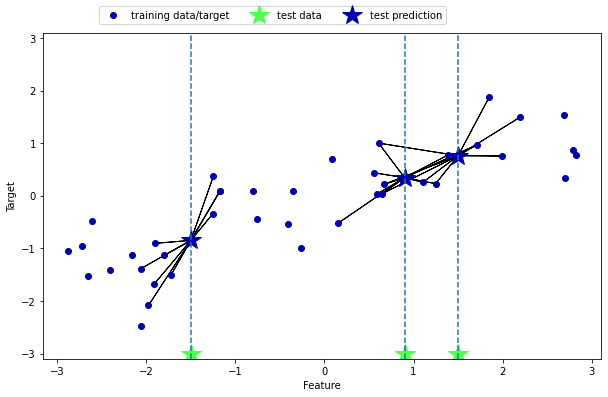

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors)

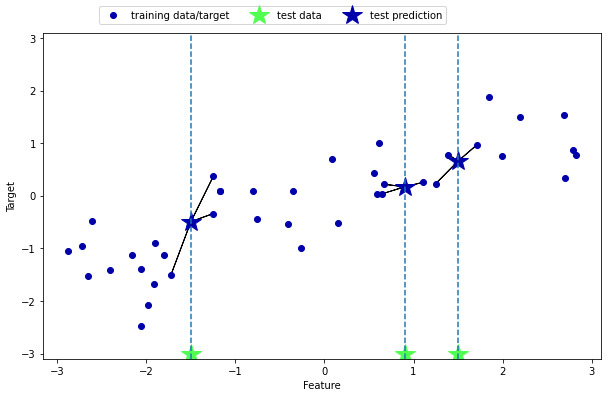

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [28]:
reg = KNeighborsRegressor(n_neighbors = 3)

In [29]:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [30]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [31]:
print("Test set R^2:{:.2f}".format(reg.score(X_test, y_test)))

Test set R^2:0.83


### 分析KNeighborsRegressor

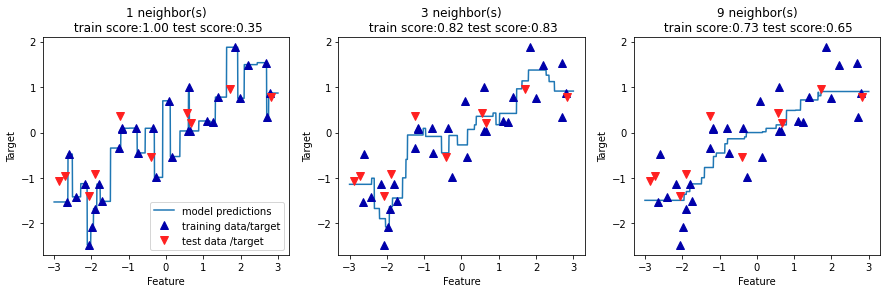

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, "v", c = mglearn.cm2(1), markersize = 8)
    ax.set_title(
    "{} neighbor(s)\n train score:{:.2f} test score:{:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["model predictions", "training data/target",
                   "test data /target"], loc = "best")

### 线性模型

w[0]: 0.393906  b: -0.031804


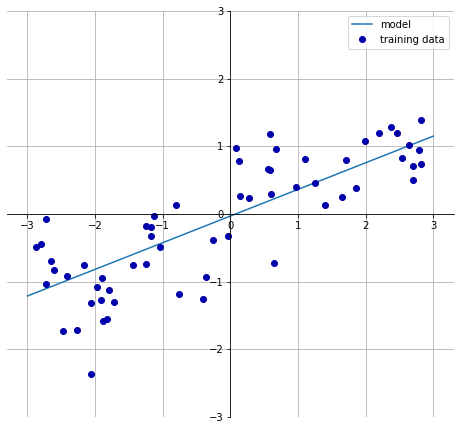

In [33]:
mglearn.plots.plot_linear_regression_wave()

## 线性回归


In [34]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [35]:
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("lr.coef_: {}".format(lr.coef_))

lr.coef_: [0.39390555]


In [37]:
print("lr.intercept_: {}".format(lr.intercept_))

lr.intercept_: -0.031804343026759746


/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

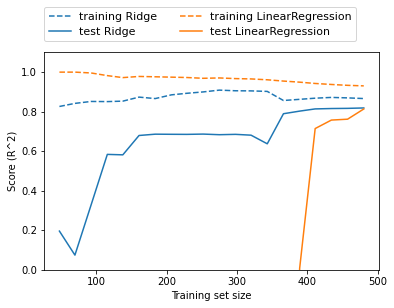

In [38]:
mglearn.plots.plot_ridge_n_samples()

### lasso

In [39]:
from sklearn.linear_model import Lasso

In [43]:
lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso.coef_!=0)))
#模型只用到了105个特征中的4个，为了降低欠拟合，减少alpha，增加max_iter的值

training set score: 0.29
test set score: 0.24
Number of feature used: 1


In [44]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso001.coef_!=0)))

training set score: 0.67
test set score: 0.66
Number of feature used: 1


### 用于分类的线性模型

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


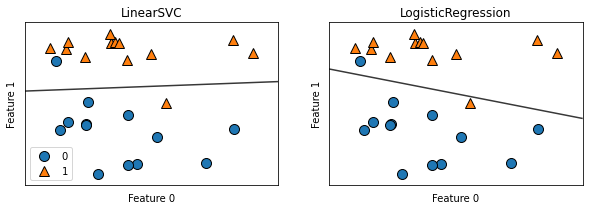

In [49]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model , ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5,
    ax = ax, alpha = 0.78)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

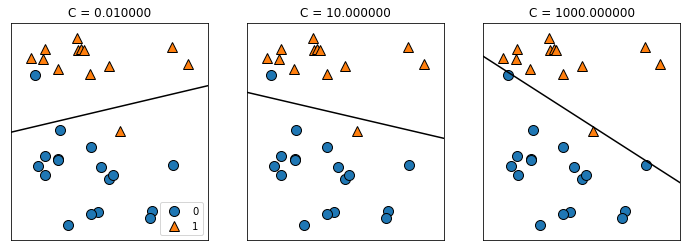

In [51]:
mglearn.plots.plot_linear_svc_regularization()#较小的c值可以让算法尽量适应大多数数据点

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state = 42
)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/Users/zhengyuanrui/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 用于多分类的线性模型

In [55]:
from sklearn.datasets import make_blobs

In [57]:
X, y = make_blobs(random_state = 42)

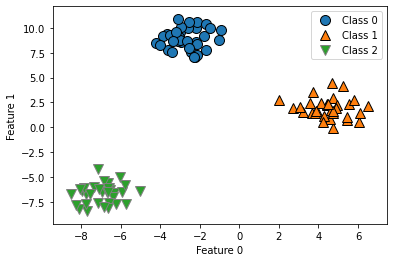

In [58]:
mglearn.discrete_scatter(X[:, 0], X[:, 1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [59]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


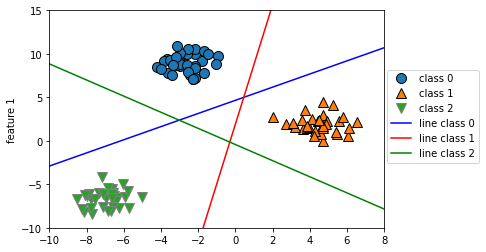

In [64]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.ylabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'line class 0', 'line class 1',
'line class 2'], loc = (1.01, 0.3))

Text(0, 0.5, 'feature 1')

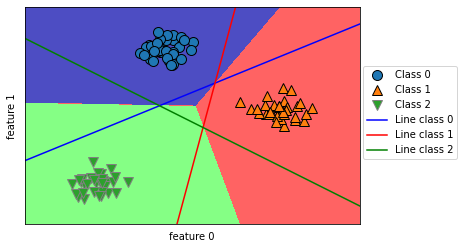

In [73]:
# 二维空间预测结果
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0] + intercept)/coef[1], c = color)
 
    plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc = (1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")
